In [1]:
from time2survive import policies_t2s, policies_t2s_std, policies_t2s_meds, policies_t2s_iqr
import matplotlib.pyplot as plt
import numpy as np


In [12]:
import pandas as pd
df = pd.read_csv("ECAI/db0_effrate0.4_we0_ECAI/db0_effrate0.4_we0_ECAI/t2s.csv")
nump = df.to_numpy()
medians = []
means = []
stds = []
iqr = []
for i in range(4):
    col = nump[:, i]
    col = col[col > 0]
    medians.append(np.median(col))
    iqr.append(np.percentile(col, 75) - np.percentile(col, 25))
    means.append(np.mean(col))
    stds.append(np.std(col))
    
print(means)
print(stds)
print(medians)
print(iqr)

[125.8734, 125.45, 455.6875, 408.21875]
[34.093808417951784, 33.26878867647574, 36.782670427118255, 62.17653012542193]
[120.0, 121.0, 470.5, 420.0]
[44.0, 42.0, 40.75, 121.5]


In [2]:
ag = 0
eff_rates = [0.2, 0.4, 0.6, 0.8]
db = [0, 1, 10, 1000]
meds = np.array([policies_t2s_meds[eff_rate][s][ag] for eff_rate in eff_rates for s in db])
meds.shape

(16,)

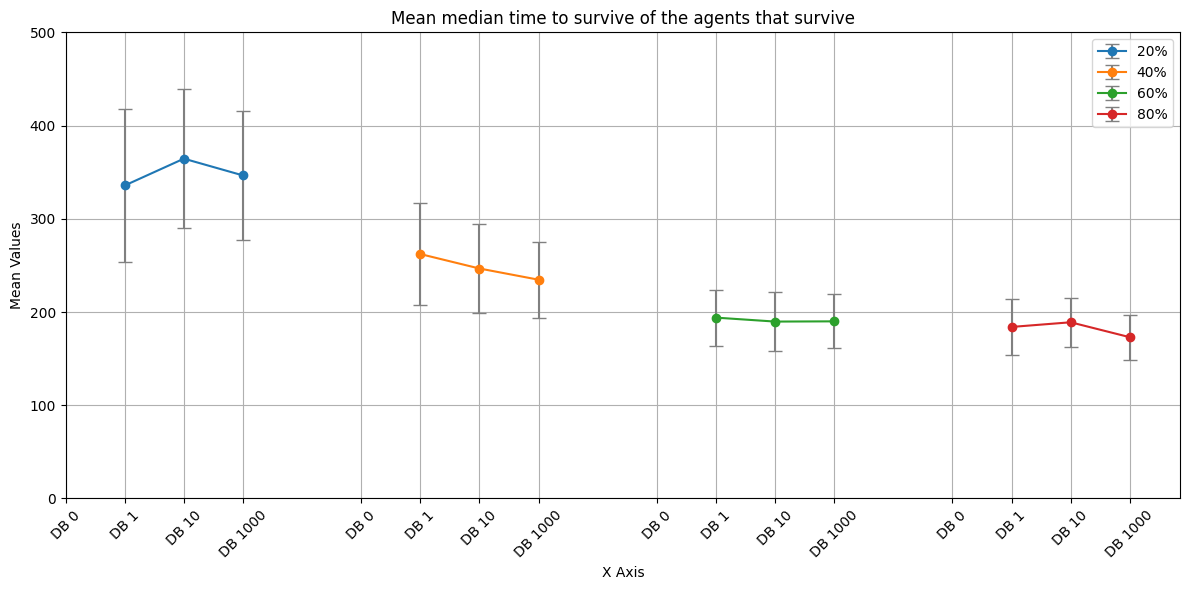

In [3]:
eff_rates = [0.2, 0.4, 0.6, 0.8]
db = [0, 1, 10, 1000]

# Step 1: Define your data (16 means and 16 stds)
meds = []
iqr = []
for eff_rate in eff_rates:
    for s in db:
        meds.append(policies_t2s_meds[eff_rate][s][int(eff_rate*5):].mean())
        iqr.append(policies_t2s_iqr[eff_rate][s][int(eff_rate*5):].mean())

meds = np.array(meds)
iqr = np.array(iqr)

# Step 2: Define the x positions with separation between groups
x_positions = np.array([
    0, 1, 2, 3,    # Group 1
    5, 6, 7, 8,    # Group 2
    10, 11, 12, 13, # Group 3
    15, 16, 17, 18  # Group 4
])


x_labels = [
    'DB 0', 'DB 1', 'DB 10', 'DB 1000',    
]
x_labels = x_labels * 4
group_labels = ['20%', '40%', '60%', '80%']

# Plot each group with error bars
plt.figure(figsize=(12, 6))

# Plot each group with different colors
for i in range(4):
    start = i * 4
    end = start + 4
    plt.errorbar(x_positions[start:end], meds[start:end], yerr=iqr[start:end], 
                 fmt='-o', ecolor='gray', capsize=5, label=f"{group_labels[i]}")

# Add individual labels to the x-axis
plt.xticks(x_positions, x_labels, rotation=45)
plt.ylim(0, 500)
# Add group labels below the individual labels
for idx, group in enumerate(group_labels):
    # Calculate the position of the group label as the middle of the group's points
    group_pos = np.mean(x_positions[idx * 4:(idx + 1) * 4])
    #plt.text(group_pos, plt.ylim()[0] + 8.5, group, ha='center', va='top', fontsize=12, fontweight='bold')

# Customize labels, title, and grid
plt.xlabel('X Axis')
plt.ylabel('Mean Values')
plt.title('Mean median time to survive of the agents that survive')
plt.grid(True)
plt.legend()

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()


In [4]:
policies_t2s[0.4][1]

array([152.49, 151.58, 278.42, 237.35, 286.68])

In [5]:
policies_t2s[0.4][10]

array([143.35, 135.94, 260.96, 260.88, 227.46])